In [1]:
import pandas as pd
import numpy as np

# Lab 08 - Virtual Screening Problem
In this lab, your task is to create a predictive Machine Learning model that will be deployed as a Virtual Screening (VS) tool. VS is a powerful computational technique used to evaluate the desired biological activity of thousands of drug molecules. By using this technology, we can significantly reduce the time and expenses involved in the drug development pipeline.

In this lab, you will take on the role of a **Machine Learning Engineer** at an innovative Pharmaceutical company. Your team has been working on identifying new treatments for Chagas disease, and your job is to train a machine learning model that can be used as a virtual screening tool to identify potential candidates for the treatment. After conducting some research, you've found a promising dataset of a detailed [_in vivo_](https://ridgewayresearch.co.uk/parasite-diagnostics-laboratory/in-vitro-in-vivo-assays/#:~:text=In%20vivo%20assays%20are%20used,Assess%20their%20safety) assay where thousands of molecules were evaluated to determine their biological activity in suppressing Trypanosoma Cruzi, the causal agent of Chagas disease. With your team, you've decided that this high-quality dataset can be used to train the machine learning model.

Your team of **Feature Engineers** has extracted different types of molecular features that describe these drug molecules and has generated the following dataset: `cruzi_comp_activity_molecular_features.csv`. However, they've also informed you that for some molecules, some molecular features, specifically "NumberOfAromaticRings" and "TPSA", couldn't be extracted. It's now up to you, the ML Engineer, to decide how to handle this issue.

The outcome of the in vivo assay is recorded in the "EC50" column of the dataset. According to the report, any molecule with an EC50 activity of less than or equal to 1 $\mu M$ is considered active. This means that for a molecule to be deemed active, its EC50 value must be no greater than 1 $\mu M$. These active molecules can then be prioritized as potential candidates for a new treatment against Chagas disease.

You will need to analyze the data, consider the problem at hand, and decide whether to train a regression or a classification model. You will also need to select a correct and relevant performance metric for your model(s).

Please note that you are free to use any of the algorithms that were covered in the class for both regression and classification tasks. However, you must not import any other classifiers, such as Random Forests, XgBoost, or any other algorithm not covered in the class.

The task for today is analyse the performance of the different methods when applied to this interesting real-life problem, and obtain the best predictive model. As a side task, you can compare your own implementations of the algorithms with the sklearn ones and see if they behave in the same way and if they don't then try to think what could be causing these differences. 

In [2]:
# import the data
mol_df = pd.read_csv('cruzi_comp_activity_molecular_features.csv')

In [9]:
# your code goes here... You can add as many code cells as you wish.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y = mol_df["EC50"].to_numpy()
X = mol_df.drop(["CID", "EC50"], axis = 1).to_numpy()

col_means = np.nanmean(X, axis = 0)
nans = np.where(np.isnan(X))
X[nans] = np.take(col_means, nans[1])

X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 3/17)

[-60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439, -60316.30861491439,

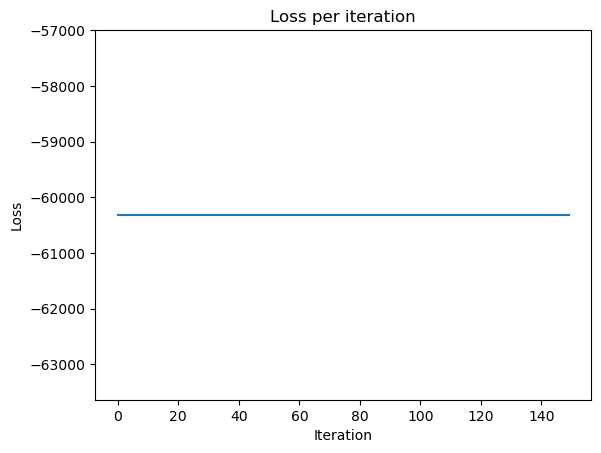

In [29]:
# Função para calcular a sigmoide
def sigmoid(a):
    result = 1/(1 + np.exp(-a))
    return result

# Função para calcular o erro pela entropia cruzada
def cross_entropy(y_true, y_pred):
    return -(y_true.T @ np.log(y_pred + 10**(-10)) + (1 - y_true).T @ np.log(1 - y_pred + 10**(-10)))

# Função para aprender os parâmetros da regressão logística
def logistic_regression(X, y, lr, max_iter):
    # Histórico dos erros
    history_loss = []
    # Número de características
    n_of_features = X.shape[1]

    # Inicializando o w
    w = np.random.normal(scale = 1, size = n_of_features)

    # Fazendo a primeira predição
    y_pred = sigmoid(X @ w)

    # Para cada iteração...
    for _ in range(max_iter):
        # Calcula o gradiente
        gradient = X.T @ (y_pred - y)
        # Atualiza o w
        w -= lr * gradient
        # Faz a nova predição
        y_pred = sigmoid(X @ w)
        # Calcula e salva o erro
        error = cross_entropy(y, y_pred)
        history_loss.append(error)

    print(history_loss)

    # Plotando o gráfico do erro por iteração
    plt.plot(history_loss)
    plt.title("Loss per iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

    return w

# Aprendendo os parâmetros
w = logistic_regression(X_train, y_train, 1, 150)

## Round 2
After conducting some initial experiments, your team is not entirely satisfied with the obtained results. Several factors could be affecting the performance at this stage. One possible reason could be that the dataset size is too small, with insufficient assessed compounds. Another possible cause could be that the features used are not adequately descriptive. To address this, you request the feature engineers to extract additional features for the compounds. They have generated a new dataset, named `cruzi_comp_activity_structural_features.csv`, which includes the chemical substructures present in each compound that are known to be informative of biological activity.

Your next task is to assess the effectiveness of these newly extracted features. It is crucial to determine if they improve the model's performance. You can experiment with both sets of features or even the combination of both. With these many algorithms and parameters to set, the validation set will be very important! Report the performance of each model on a held-out test set with relevant evaluation metrics. 

In [2]:
# load the dataset
struct_df = pd.read_csv('data/cruzi_comp_activity_structural_features.csv')

In [3]:
# your code goes here... You can add as many code cells as you wish.


Below is a markdown example of how you can report the results! Feel free to modify it to your liking!

| **Method**        | **Metric 1** | **Metric 2** | **Metric 3** | **...** |
|-------------------|--------------|--------------|--------------|---------|
| **Log Reg**       |              |              |              |         |
| **KNN**           |              |              |              |         |
| **Neural Nets**   |              |              |              |         |
| **Random Forest** |              |              |              |         |
| **...**           |              |              |              |         |